In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import make_blobs

In [8]:
# Step 1: Generate normal clustered data
n_samples = 300
n_features = 2
n_clusters = 2
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

In [9]:
# Step 2: Generate local outliers (near clusters but slightly displaced)
n_local_outliers = 10
local_outliers = X[np.random.choice(X.shape[0], n_local_outliers, replace=False)] + np.random.normal(0, 0.5, (n_local_outliers, n_features))

In [10]:
# Step 3: Generate global outliers (completely random, far from clusters)
n_global_outliers = 5
global_outliers = np.random.uniform(low=-10, high=10, size=(n_global_outliers, n_features))

In [11]:
# Combine normal data, local outliers, and global outliers
X = np.vstack([X, local_outliers, global_outliers])

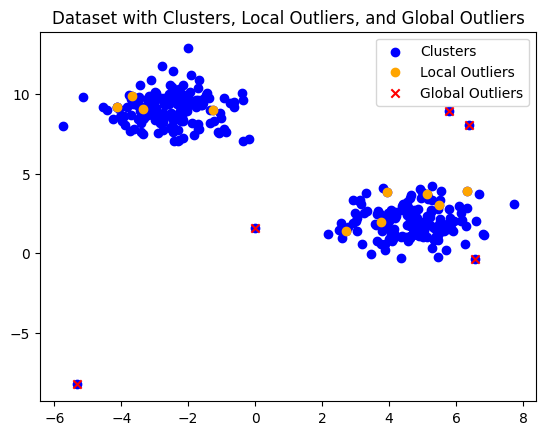

In [12]:
# Step 4: Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', label="Clusters")
plt.scatter(local_outliers[:, 0], local_outliers[:, 1], c='orange', marker='o', label="Local Outliers")
plt.scatter(global_outliers[:, 0], global_outliers[:, 1], c='red', marker='x', label="Global Outliers")
plt.legend()
plt.title("Dataset with Clusters, Local Outliers, and Global Outliers")
plt.show()

In [13]:
from sklearn.neighbors import LocalOutlierFactor

In [58]:
lof = LocalOutlierFactor(n_neighbors=7,contamination=0.5)

In [59]:
y_pred = lof.fit_predict(X)

In [60]:
y_pred

array([ 1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1

In [61]:
lof_scores = lof.negative_outlier_factor_  # Lower means more likely an outlier
lof_scores

array([ -0.96429695,  -1.63615526,  -1.02240474,  -1.0088034 ,
        -1.07598988,  -1.17434291,  -0.98633961,  -1.03602458,
        -0.98848607,  -1.19339882,  -0.97359651,  -1.03909577,
        -1.02925554,  -1.02397153,  -1.05796485,  -0.98935416,
        -1.05967897,  -1.25139617,  -0.99481981,  -1.02069615,
        -1.03725864,  -1.08474712,  -0.96944536,  -1.04232963,
        -1.00733651,  -1.03931701,  -1.79383339,  -1.00293089,
        -0.98321654,  -1.07838313,  -1.41226684,  -1.20063987,
        -1.22111811,  -1.01437204,  -0.96110996,  -1.02526905,
        -1.01854152,  -1.17946879,  -1.00026624,  -1.07651243,
        -1.07460115,  -1.09840153,  -0.99599814,  -1.00183577,
        -1.01214997,  -0.98949612,  -1.03474916,  -0.98241083,
        -1.00624524,  -0.93199344,  -1.05492954,  -1.02116304,
        -1.1193159 ,  -0.9855955 ,  -0.98325668,  -0.98165516,
        -1.04465024,  -1.08136888,  -1.01554563,  -1.12399733,
        -0.97568699,  -1.04815697,  -1.00027662,  -1.73

In [62]:
# Step 3: Categorize Outliers
global_outlier_threshold = -2.5
local_outlier_threshold = -1.5

In [63]:
global_outliers_detected = X[lof_scores < global_outlier_threshold]
local_outliers_detected = X[(lof_scores < local_outlier_threshold) & (lof_scores >= global_outlier_threshold)]

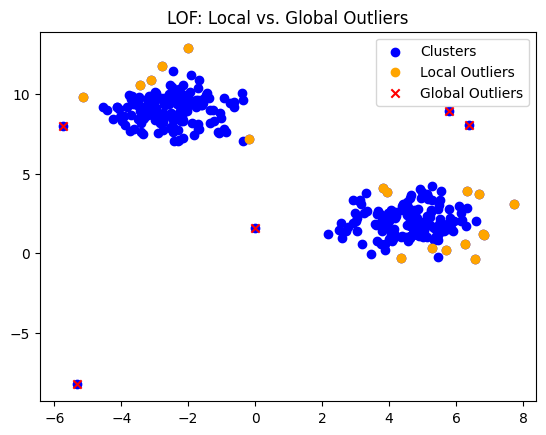

In [64]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label="Clusters")
plt.scatter(local_outliers_detected[:, 0], local_outliers_detected[:, 1], c='orange', marker='o', label="Local Outliers")
plt.scatter(global_outliers_detected[:, 0], global_outliers_detected[:, 1], c='red', marker='x', label="Global Outliers")
plt.legend()
plt.title("LOF: Local vs. Global Outliers")
plt.show()